In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('loan_dataset.csv')
data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [ ]:
data.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [ ]:
repay_cols=['m1','m2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

In [ ]:
data[repay_cols]

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,1,1
4,0,1,2,3,4,5,6,7,8,9,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...
116053,0,0,0,0,0,0,0,0,0,0,0,0
116054,0,0,0,0,0,0,0,0,0,0,0,0
116055,0,0,0,0,0,0,0,0,0,0,0,0
116056,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data['m13'].value_counts()

0    115422
1       636
Name: m13, dtype: int64

In [ ]:
data['loan_id'].nunique()

116058

In [ ]:
data['source'].value_counts()

X    63858
Y    37554
Z    14646
Name: source, dtype: int64

In [ ]:
data['financial_institution'].value_counts()

OTHER                          49699
Browning-Hart                  31852
Swanson, Newton and Miller      6874
Edwards-Hoffman                 4857
Martinez, Duffy and Bird        4715
Miller, Mcclure and Allen       3158
Nicholson Group                 2116
Turner, Baldwin and Rhodes      1846
Suarez Inc                      1790
Cole, Brooks and Vincent        1642
Richards-Walters                1459
Taylor, Hunt and Rodriguez      1259
Sanchez-Robinson                1193
Sanchez, Hays and Wilkerson      853
Romero, Woods and Johnson        750
Thornton-Davis                   651
Anderson-Taylor                  483
Richardson Ltd                   473
Chapman-Mcmahon                  388
Name: financial_institution, dtype: int64

In [ ]:
data['interest_rate']

0         4.250
1         4.875
2         3.250
3         4.750
4         4.750
          ...  
116053    4.125
116054    3.000
116055    3.875
116056    4.250
116057    3.375
Name: interest_rate, Length: 116058, dtype: float64

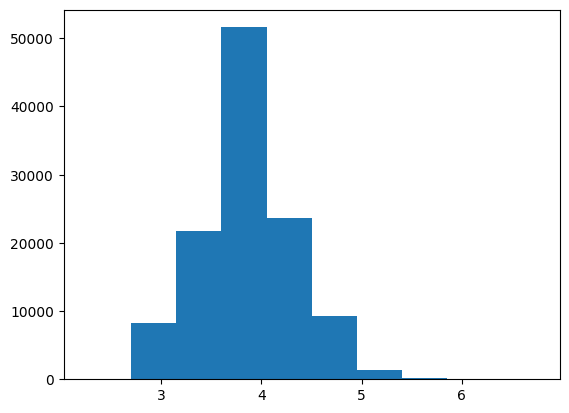

In [ ]:
## distribution
plt.hist(data['interest_rate'])
plt.show()

In [ ]:
data['interest_rate'].describe()

count    116058.000000
mean          3.868961
std           0.461020
min           2.250000
25%           3.500000
50%           3.875000
75%           4.125000
max           6.750000
Name: interest_rate, dtype: float64

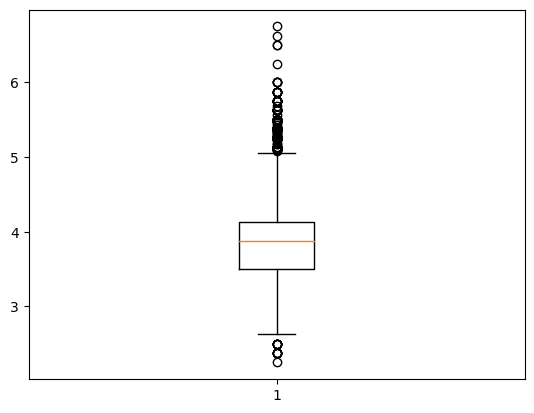

In [ ]:
plt.boxplot(data['interest_rate'])
plt.show()

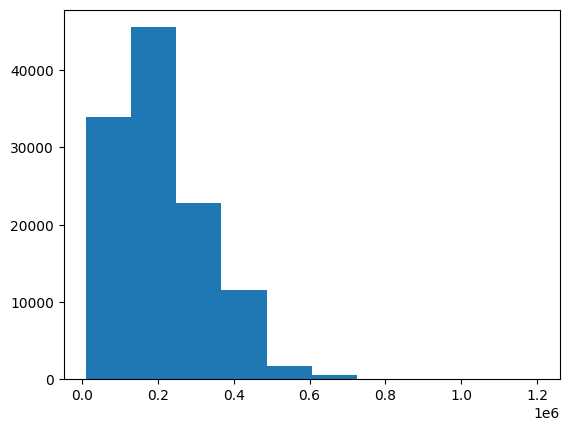

In [ ]:
plt.hist(data['unpaid_principal_bal'])
plt.show()

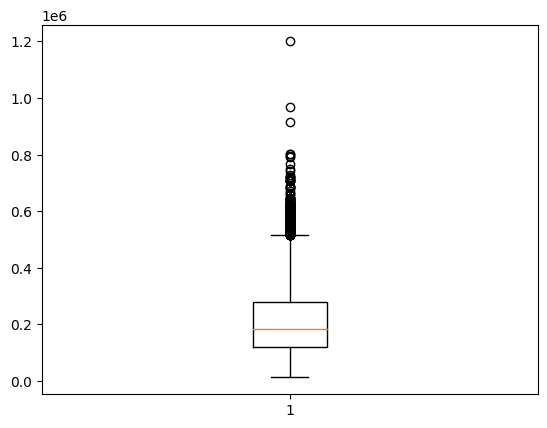

In [ ]:
plt.boxplot(data['unpaid_principal_bal'])
plt.show()

In [ ]:
data['unpaid_principal_bal'].describe()

count    1.160580e+05
mean     2.082262e+05
std      1.146851e+05
min      1.100000e+04
25%      1.200000e+05
50%      1.830000e+05
75%      2.780000e+05
max      1.200000e+06
Name: unpaid_principal_bal, dtype: float64

In [ ]:
data[data['unpaid_principal_bal']>1100000]

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
84135,995271859875,Z,Nicholson Group,3.625,1200000,180,2012-01-01,03/2012,49,2.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data=data.drop(84135)

In [ ]:
data['loan_term'].value_counts()

360    71812
180    28583
120     7061
240     6749
300      912
       ...  
304        1
78         1
308        1
295        1
267        1
Name: loan_term, Length: 140, dtype: int64

In [ ]:
data['loan_term'].describe()

count    116057.000000
mean        292.281965
std          89.762196
min          60.000000
25%         180.000000
50%         360.000000
75%         360.000000
max         360.000000
Name: loan_term, dtype: float64

In [ ]:
data['origination_date']

0         2012-03-01
1         2012-01-01
2         2012-01-01
3         2012-02-01
4         2012-02-01
             ...    
116053    2012-02-01
116054    2012-01-01
116055    2012-02-01
116056    2012-02-01
116057    2012-01-01
Name: origination_date, Length: 116057, dtype: object

In [ ]:
data['first_payment_date']

0         05/2012
1         03/2012
2         03/2012
3         04/2012
4         04/2012
           ...   
116053    04/2012
116054    03/2012
116055    04/2012
116056    04/2012
116057    03/2012
Name: first_payment_date, Length: 116057, dtype: object

In [ ]:
data['loan_to_value']

0         95
1         72
2         49
3         46
4         80
          ..
116053    88
116054    35
116055    58
116056    74
116057    29
Name: loan_to_value, Length: 116057, dtype: int64

In [ ]:
data['loan_to_value'].describe()

count    116057.000000
mean         67.432098
std          17.291709
min           6.000000
25%          57.000000
50%          72.000000
75%          80.000000
max          97.000000
Name: loan_to_value, dtype: float64

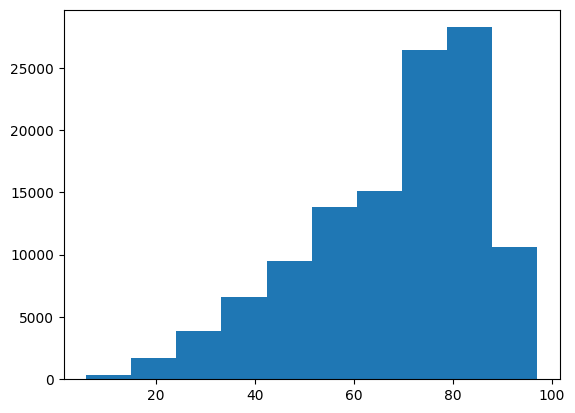

In [ ]:
plt.hist(data['loan_to_value'])
plt.show()

In [ ]:
data['number_of_borrowers'].value_counts()

2.0    68843
1.0    47214
Name: number_of_borrowers, dtype: int64

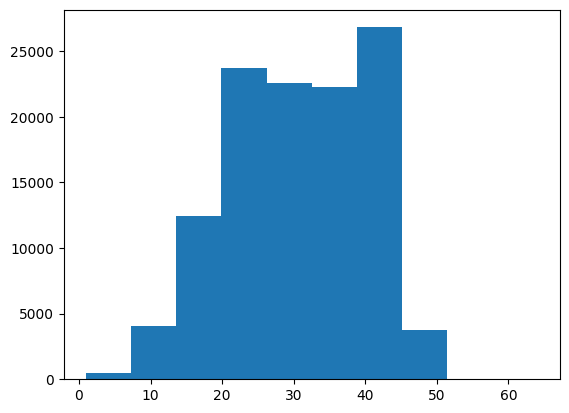

In [ ]:
plt.hist(data['debt_to_income_ratio'])
plt.show()

In [ ]:
data.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [ ]:
data['borrower_credit_score'].describe()

count    116057.000000
mean        769.926545
std          42.210813
min           0.000000
25%         751.000000
50%         782.000000
75%         800.000000
max         840.000000
Name: borrower_credit_score, dtype: float64

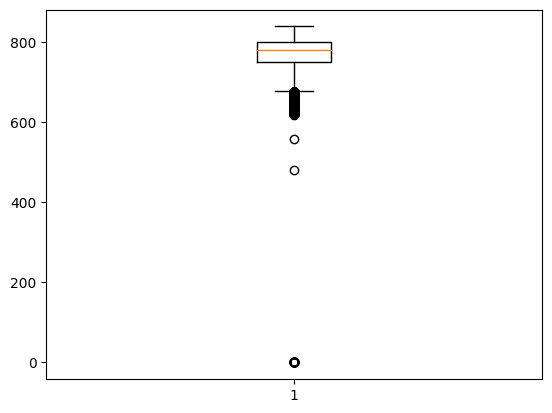

In [ ]:
plt.boxplot(data['borrower_credit_score'])
plt.show()

In [ ]:
data[data['borrower_credit_score']<100]['borrower_credit_score']

683       0.0
4417      0.0
9571      0.0
11175     0.0
13977     0.0
16618     0.0
16665     0.0
21881     0.0
23969     0.0
25323     0.0
31433     0.0
32939     0.0
33284     0.0
34959     0.0
34997     0.0
40069     0.0
41022     0.0
42871     0.0
43446     0.0
45022     0.0
47002     0.0
47585     0.0
48634     0.0
50386     0.0
51403     0.0
51433     0.0
51651     0.0
52179     0.0
55253     0.0
56408     0.0
56880     0.0
58538     0.0
59662     0.0
61249     0.0
62585     0.0
69394     0.0
69602     0.0
77282     0.0
78992     0.0
80391     0.0
81283     0.0
85346     0.0
89090     0.0
98272     0.0
100083    0.0
103206    0.0
105953    0.0
110290    0.0
114572    0.0
114982    0.0
115356    0.0
Name: borrower_credit_score, dtype: float64

In [ ]:
data[data['borrower_credit_score']<100]['borrower_credit_score'].shape

(51,)

In [ ]:
bcs=data[data['borrower_credit_score']<100]
bcs

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
683,888134221595,X,OTHER,3.750,82000,360,2012-01-01,03/2012,70,1.0,...,0,0,0,0,0,0,0,0,0,0
4417,761904018373,X,OTHER,3.250,301000,180,2012-01-01,03/2012,70,1.0,...,0,0,0,0,0,0,0,0,0,0
9571,995622857427,X,Browning-Hart,3.875,171000,360,2012-01-01,03/2012,80,1.0,...,0,0,0,0,0,0,0,0,0,0
11175,903289147761,X,OTHER,4.625,210000,360,2012-03-01,05/2012,70,1.0,...,0,0,0,0,0,0,0,0,0,0
13977,428724505949,X,OTHER,4.375,180000,360,2012-01-01,03/2012,67,1.0,...,0,0,0,0,0,0,0,0,0,0
16618,601575340227,X,Browning-Hart,2.875,169000,180,2012-01-01,03/2012,80,1.0,...,0,0,0,0,0,0,0,0,0,0
16665,171747732261,X,OTHER,4.499,95000,360,2012-02-01,04/2012,70,1.0,...,0,0,0,0,0,0,0,0,0,0
21881,797644303254,X,Browning-Hart,3.625,206000,360,2012-01-01,03/2012,80,1.0,...,0,0,0,0,0,0,0,0,0,0
23969,372350802735,X,Browning-Hart,4.750,94000,360,2012-02-01,04/2012,80,2.0,...,0,0,0,0,0,0,0,0,0,0
25323,393541713339,X,OTHER,4.250,149000,360,2012-01-01,03/2012,70,1.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
bcs['m13']

683       0
4417      0
9571      0
11175     0
13977     0
16618     0
16665     0
21881     0
23969     0
25323     0
31433     0
32939     0
33284     0
34959     0
34997     0
40069     0
41022     0
42871     0
43446     0
45022     0
47002     0
47585     0
48634     0
50386     0
51403     0
51433     0
51651     0
52179     0
55253     0
56408     0
56880     0
58538     0
59662     0
61249     0
62585     0
69394     0
69602     0
77282     0
78992     0
80391     0
81283     0
85346     0
89090     0
98272     0
100083    0
103206    0
105953    0
110290    0
114572    0
114982    0
115356    0
Name: m13, dtype: int64

In [ ]:
data['loan_purpose'].value_counts() ## one hot encoding

A23    58461
B12    29383
C86    28213
Name: loan_purpose, dtype: int64

In [ ]:
data['insurance_percent'].describe()

count    116057.000000
mean          2.786312
std           8.096494
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          40.000000
Name: insurance_percent, dtype: float64

In [ ]:
data['insurance_percent'].value_counts()

0.0     102454
30.0      5113
25.0      4885
12.0      2493
6.0        701
35.0       372
16.0        18
18.0        12
20.0         3
17.0         2
22.0         1
15.0         1
40.0         1
39.0         1
Name: insurance_percent, dtype: int64

In [ ]:
insu_35=data[data['insurance_percent']==35.0]

In [ ]:
insu_35['m13'].value_counts()

0    369
1      3
Name: m13, dtype: int64

In [ ]:
data['insurance_type']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
116053    0.0
116054    0.0
116055    0.0
116056    0.0
116057    0.0
Name: insurance_type, Length: 116057, dtype: float64

In [ ]:
data['insurance_type'].value_counts()

0.0    115679
1.0       378
Name: insurance_type, dtype: int64

In [ ]:
data.isna().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

In [ ]:
data.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [ ]:
data2=data[['source','interest_rate','unpaid_principal_bal', 'loan_term','loan_to_value', 'number_of_borrowers','debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose','insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1','m2', 'm3', 'm4', 'm5','m6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12','m13']]

In [ ]:
data2

,source,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,Z,4.250,214000,360,95,1.0,22.0,694.0,C86,30.0,...,0,0,0,1,0,0,0,0,0,1
1,Y,4.875,144000,360,72,1.0,44.0,697.0,B12,0.0,...,0,0,0,0,0,0,0,1,0,1
2,Z,3.250,366000,180,49,1.0,33.0,780.0,B12,0.0,...,0,0,0,0,0,0,0,0,0,1
3,X,4.750,135000,360,46,2.0,44.0,633.0,B12,0.0,...,0,0,0,0,0,1,1,1,1,1
4,X,4.750,124000,360,80,1.0,43.0,681.0,C86,0.0,...,3,4,5,6,7,8,9,10,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116053,Y,4.125,153000,360,88,2.0,22.0,801.0,A23,25.0,...,0,0,0,0,0,0,0,0,0,0
116054,Z,3.000,150000,120,35,1.0,37.0,796.0,B12,0.0,...,0,0,0,0,0,0,0,0,0,0
116055,X,3.875,166000,360,58,2.0,49.0,724.0,B12,0.0,...,0,0,0,0,0,0,0,0,0,0
116056,X,4.250,169000,360,74,2.0,13.0,755.0,A23,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116057 entries, 0 to 116057
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   source                    116057 non-null  object 
 1   interest_rate             116057 non-null  float64
 2   unpaid_principal_bal      116057 non-null  int64  
 3   loan_term                 116057 non-null  int64  
 4   loan_to_value             116057 non-null  int64  
 5   number_of_borrowers       116057 non-null  float64
 6   debt_to_income_ratio      116057 non-null  float64
 7   borrower_credit_score     116057 non-null  float64
 8   loan_purpose              116057 non-null  object 
 9   insurance_percent         116057 non-null  float64
 10  co-borrower_credit_score  116057 non-null  float64
 11  insurance_type            116057 non-null  float64
 12  m1                        116057 non-null  int64  
 13  m2                        116057 non-null  i

In [ ]:
## Logistic regression ,KNN,Decision Tree,Random Forest

In [ ]:
data2

,source,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,Z,4.250,214000,360,95,1.0,22.0,694.0,C86,30.0,...,0,0,0,1,0,0,0,0,0,1
1,Y,4.875,144000,360,72,1.0,44.0,697.0,B12,0.0,...,0,0,0,0,0,0,0,1,0,1
2,Z,3.250,366000,180,49,1.0,33.0,780.0,B12,0.0,...,0,0,0,0,0,0,0,0,0,1
3,X,4.750,135000,360,46,2.0,44.0,633.0,B12,0.0,...,0,0,0,0,0,1,1,1,1,1
4,X,4.750,124000,360,80,1.0,43.0,681.0,C86,0.0,...,3,4,5,6,7,8,9,10,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116053,Y,4.125,153000,360,88,2.0,22.0,801.0,A23,25.0,...,0,0,0,0,0,0,0,0,0,0
116054,Z,3.000,150000,120,35,1.0,37.0,796.0,B12,0.0,...,0,0,0,0,0,0,0,0,0,0
116055,X,3.875,166000,360,58,2.0,49.0,724.0,B12,0.0,...,0,0,0,0,0,0,0,0,0,0
116056,X,4.250,169000,360,74,2.0,13.0,755.0,A23,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.shape

(116057, 29)

In [ ]:
data3 =pd.get_dummies(data2)
data3

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,m10,m11,m12,m13,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,1
1,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,0.0,...,0,1,0,1,0,1,0,0,1,0
2,3.250,366000,180,49,1.0,33.0,780.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,1,0
3,4.750,135000,360,46,2.0,44.0,633.0,0.0,638.0,0.0,...,1,1,1,1,1,0,0,0,1,0
4,4.750,124000,360,80,1.0,43.0,681.0,0.0,0.0,0.0,...,9,10,11,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116053,4.125,153000,360,88,2.0,22.0,801.0,25.0,802.0,0.0,...,0,0,0,0,0,1,0,1,0,0
116054,3.000,150000,120,35,1.0,37.0,796.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
116055,3.875,166000,360,58,2.0,49.0,724.0,0.0,723.0,0.0,...,0,0,0,0,1,0,0,0,1,0
116056,4.250,169000,360,74,2.0,13.0,755.0,0.0,746.0,0.0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
data3.columns

Index(['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13', 'source_X', 'source_Y', 'source_Z', 'loan_purpose_A23',
       'loan_purpose_B12', 'loan_purpose_C86'],
      dtype='object')

In [ ]:
x=data3.drop('m13',axis=1)
y=data3['m13']

In [ ]:
###  feature engineering techniques

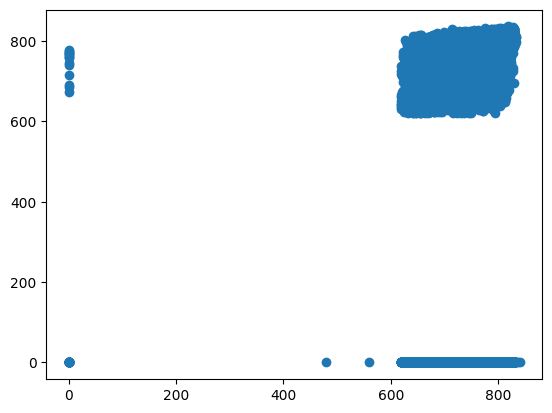

In [ ]:
plt.scatter(x['borrower_credit_score'],x['co-borrower_credit_score'])
plt.show()

In [ ]:
x['borrower_credit_score']+x['co-borrower_credit_score']

0          694.0
1          697.0
2          780.0
3         1271.0
4          681.0
           ...  
116053    1603.0
116054     796.0
116055    1447.0
116056    1501.0
116057    1536.0
Length: 116057, dtype: float64

In [ ]:
x['total_score']=x['borrower_credit_score']+x['co-borrower_credit_score']

In [ ]:
x

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,m10,m11,m12,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86,total_score
0,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,694.0
1,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,1,0,697.0
2,3.250,366000,180,49,1.0,33.0,780.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,780.0
3,4.750,135000,360,46,2.0,44.0,633.0,0.0,638.0,0.0,...,1,1,1,1,0,0,0,1,0,1271.0
4,4.750,124000,360,80,1.0,43.0,681.0,0.0,0.0,0.0,...,9,10,11,1,0,0,0,0,1,681.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116053,4.125,153000,360,88,2.0,22.0,801.0,25.0,802.0,0.0,...,0,0,0,0,1,0,1,0,0,1603.0
116054,3.000,150000,120,35,1.0,37.0,796.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,796.0
116055,3.875,166000,360,58,2.0,49.0,724.0,0.0,723.0,0.0,...,0,0,0,1,0,0,0,1,0,1447.0
116056,4.250,169000,360,74,2.0,13.0,755.0,0.0,746.0,0.0,...,0,0,0,1,0,0,1,0,0,1501.0


In [ ]:
x.drop(['borrower_credit_score','co-borrower_credit_score'],axis=1)

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,insurance_percent,insurance_type,m1,m2,...,m10,m11,m12,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86,total_score
0,4.250,214000,360,95,1.0,22.0,30.0,0.0,0,0,...,0,0,0,0,0,1,0,0,1,694.0
1,4.875,144000,360,72,1.0,44.0,0.0,0.0,0,0,...,0,1,0,0,1,0,0,1,0,697.0
2,3.250,366000,180,49,1.0,33.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,1,0,780.0
3,4.750,135000,360,46,2.0,44.0,0.0,0.0,0,0,...,1,1,1,1,0,0,0,1,0,1271.0
4,4.750,124000,360,80,1.0,43.0,0.0,0.0,0,1,...,9,10,11,1,0,0,0,0,1,681.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116053,4.125,153000,360,88,2.0,22.0,25.0,0.0,0,0,...,0,0,0,0,1,0,1,0,0,1603.0
116054,3.000,150000,120,35,1.0,37.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,1,0,796.0
116055,3.875,166000,360,58,2.0,49.0,0.0,0.0,0,0,...,0,0,0,1,0,0,0,1,0,1447.0
116056,4.250,169000,360,74,2.0,13.0,0.0,0.0,0,0,...,0,0,0,1,0,0,1,0,0,1501.0


In [ ]:
x=x.drop(['borrower_credit_score','co-borrower_credit_score'],axis=1)

In [ ]:
x.columns

Index(['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'insurance_percent',
       'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12', 'source_X', 'source_Y', 'source_Z',
       'loan_purpose_A23', 'loan_purpose_B12', 'loan_purpose_C86',
       'total_score'],
      dtype='object')

In [ ]:
x.shape

(116057, 27)

In [ ]:
repay_cols

['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

In [ ]:
x.head(1)[repay_cols]

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
x[repay_cols].mean()

m1     0.003197
m2     0.002059
m3     0.001973
m4     0.002180
m5     0.003533
m6     0.003421
m7     0.004162
m8     0.004825
m9     0.005359
m10    0.006617
m11    0.007109
m12    0.008065
dtype: float64

In [ ]:
x['emi_mean']=x[repay_cols].mean(axis=1)

In [ ]:
x['emi_median']=x[repay_cols].median(axis=1)

In [ ]:
x['emi_std']=x[repay_cols].std(axis=1)

In [ ]:
x.shape

(116057, 30)

In [ ]:
## Logistic regression
y.value_counts(normalize=True)*100

0    115421
1       636
Name: m13, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=123,stratify=y)

In [ ]:
y_train.value_counts()

0    98107
1      541
Name: m13, dtype: int64

In [ ]:
y_test.value_counts()

0    17314
1       95
Name: m13, dtype: int64

In [ ]:
## scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
x_train.columns

Index(['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'insurance_percent',
       'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12', 'source_X', 'source_Y', 'source_Z',
       'loan_purpose_A23', 'loan_purpose_B12', 'loan_purpose_C86',
       'total_score', 'emi_mean', 'emi_median', 'emi_std'],
      dtype='object')

In [ ]:
num_cols=['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value','number_of_borrowers', 'debt_to_income_ratio', 'insurance_percent','insurance_type']

In [ ]:
x_train.loc[:,num_cols]=sc.fit_transform(x_train[num_cols])
x_test.loc[:,num_cols]=sc.fit_transform(x_test[num_cols])

In [ ]:
x_train

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,insurance_percent,insurance_type,m1,m2,...,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86,total_score,emi_mean,emi_median,emi_std
48569,1.370592,-0.597867,0.755384,0.033147,-1.208021,0.538522,-0.343800,-0.057847,0,0,...,0,1,0,0,1,0,753.0,0.0,0.0,0.0
81442,0.285059,1.635541,0.755384,0.727016,0.827800,1.257957,-0.343800,-0.057847,0,0,...,1,0,0,0,0,1,1639.0,0.0,0.0,0.0
46676,1.370592,-0.632764,0.755384,1.594353,-1.208021,1.463510,3.361917,17.287046,0,0,...,0,0,1,0,0,1,775.0,0.0,0.0,0.0
5581,2.456125,-0.990458,0.755384,-0.602900,0.827800,-0.283688,-0.343800,-0.057847,0,0,...,1,0,0,1,0,0,1610.0,0.0,0.0,0.0
83686,0.285059,-1.077700,-1.918519,-0.602900,-1.208021,1.052404,-0.343800,-0.057847,0,0,...,1,0,0,1,0,0,676.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34831,0.556442,0.222213,0.755384,-0.429433,-1.208021,0.949628,-0.343800,-0.057847,0,0,...,1,0,0,1,0,0,705.0,0.0,0.0,0.0
19313,-1.343241,-0.344863,-1.250043,0.495726,0.827800,1.360733,-0.343800,-0.057847,0,0,...,0,1,0,1,0,0,1399.0,0.0,0.0,0.0
82180,-1.718835,1.818750,-1.250043,-0.545078,-1.208021,-1.517004,-0.343800,-0.057847,0,0,...,1,0,0,0,0,1,722.0,0.0,0.0,0.0
90646,-1.343241,0.763116,-1.250043,-0.255966,0.827800,-1.928110,-0.343800,-0.057847,0,0,...,0,0,1,1,0,0,1584.0,0.0,0.0,0.0


In [ ]:
num_cols=['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value','number_of_borrowers', 'debt_to_income_ratio','total_score' 'insurance_percent','insurance_type']

In [ ]:
x_test

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,insurance_percent,insurance_type,m1,m2,...,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86,total_score,emi_mean,emi_median,emi_std
59021,0.819117,1.686337,0.748967,0.725708,0.830088,1.167040,-0.346061,-0.053128,0,0,...,0,1,0,1,0,0,1624.0,0.000000,0.0,0.000000
33835,0.279590,0.527541,0.748967,1.015120,-1.204691,-0.065694,1.135181,-0.053128,0,0,...,0,1,0,1,0,0,797.0,0.000000,0.0,0.000000
96224,1.088881,-0.160767,0.748967,0.725708,-1.204691,1.783407,-0.346061,-0.053128,0,0,...,0,1,0,0,0,1,704.0,0.000000,0.0,0.000000
96185,1.337063,-0.430862,0.748967,0.725708,0.830088,0.139762,-0.346061,-0.053128,0,0,...,0,1,0,0,0,1,1438.0,0.000000,0.0,0.000000
150,1.358644,0.030914,0.748967,0.436295,-1.204691,1.064312,-0.346061,-0.053128,0,0,...,0,1,0,0,0,1,666.0,0.416667,0.0,0.668558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93431,0.279590,-0.735809,0.748967,0.436295,-1.204691,-1.401156,-0.346061,-0.053128,0,0,...,1,0,0,1,0,0,807.0,0.000000,0.0,0.000000
91485,-2.148281,-0.247894,-1.255692,0.609943,0.830088,1.167040,-0.346061,-0.053128,0,0,...,1,0,0,1,0,0,1570.0,0.000000,0.0,0.000000
96874,-0.259937,0.736647,0.748967,0.204765,0.830088,1.167040,-0.346061,-0.053128,0,0,...,0,1,0,1,0,0,1566.0,0.000000,0.0,0.000000
100728,0.549354,0.344573,0.748967,0.725708,-1.204691,-0.579333,-0.346061,-0.053128,0,0,...,0,1,0,0,0,1,665.0,0.000000,0.0,0.000000


In [ ]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9960939743810673

In [ ]:
confusion_matrix(y_test,y_pred)

array([[17307,     7],
       [   61,    34]])

In [ ]:
f1_score(y_test,y_pred)

0.4999999999999999

In [ ]:
precision_score(y_test,y_pred)

0.8292682926829268

In [ ]:

recall_score(y_test,y_pred)

0.35789473684210527

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)

In [ ]:
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [ ]:
f1_score(y_test,y_pred)

0.099009900990099

In [ ]:
confusion_matrix(y_test,y_pred)

array([[17313,     1],
       [   90,     5]])

In [ ]:
### tree based algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(max_depth=16)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[17260,    54],
       [   61,    34]])

In [ ]:
f1_score(y_test,y_pred)

0.37158469945355194

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=300,max_depth=8)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [ ]:
f1_score(y_test,y_pred)

0.4661654135338346

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lr,x,y,cv=5,scoring="f1")
scores.mean()

0.0

In [ ]:
scores=cross_val_score(rf,x,y,cv=5,scoring="f1")
scores.mean()

0.492287714519831